In [38]:
# Load packages 
import json
import pandas as pd 
import numpy as np 
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
from collections import defaultdict

In [2]:
# Load dataset for analysis
with open('./wmt.jsonl', 'r') as json_file:
    json_list = list(json_file)

In [3]:
##Create multiple dictionaries to store values corresponding to a source
# candidate_dict = {}

# for json_str in tqdm(json_list):
#     result = json.loads(json_str)
#     if result['source'] not in candidate_dict:
#         candidate_dict[result['source']] = []
#     else:
#         candidate_dict[result['source']].append((result['candidate'].lower(),result['raw_rating'], result['score'], result['system'], result['lang'] ))

In [4]:
# # Map and Create data with "Source" as a key
# from collections import defaultdict
# candidate_dict = defaultdict(list)

# for json_str in tqdm(json_list):
#     result = json.loads(json_str)
#     candidate_dict[result['source']].append((result['candidate'].lower(),result['raw_rating'], result['score'], result['system'], result['lang'] ))

### EXACT SAME ANALYSIS (CHECK WITH LOWERCASE)

In [5]:
out_dict = defaultdict(list)

for json_str in tqdm(json_list):
    result = json.loads(json_str)
    out_dict[result['candidate'].lower()].append(result['raw_rating'])

100%|██████████████████████████████████████████████████████████████████████| 114072/114072 [00:01<00:00, 100767.65it/s]


In [6]:
len(out_dict.keys())

112908

In [8]:
red_out_dict_1 = {k: v for k, v in out_dict.items() if len(v) > 1}
red_out_dict_2 = {k: v for k, v in out_dict.items() if len(v) > 2}
red_out_dict_3 = {k: v for k, v in out_dict.items() if len(v) > 3}
red_out_dict_4 = {k: v for k, v in out_dict.items() if len(v) > 4}

In [11]:
print("Absolute numbers: ")
print(len(red_out_dict_1),len(red_out_dict_2),len(red_out_dict_3),len(red_out_dict_4))
print("Percentage numbers")
print(len(red_out_dict_1)*100/len(out_dict.keys()),len(red_out_dict_2)*100/len(out_dict.keys()),len(red_out_dict_3)*100/len(out_dict.keys()),len(red_out_dict_4)*100/len(out_dict.keys()))

Absolute numbers: 
1073 77 10 4
Percentage numbers
0.9503312431360046 0.06819711623622772 0.008856768342367236 0.003542707336946895


In [17]:
score_diff_list = []
for key in red_out_dict_1.keys():
    score_diff_list.append(max(red_out_dict_1[key])-min(red_out_dict_1[key]))

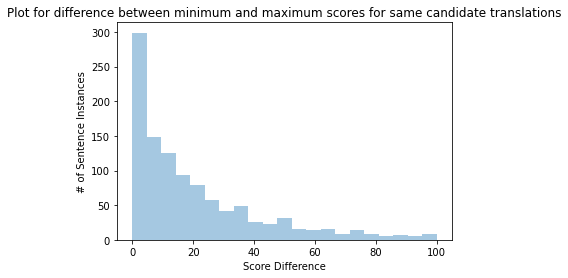

In [47]:
plt.title("Plot for difference between minimum and maximum scores for same candidate translations")
plt.xlabel("Score Difference")
plt.ylabel("# of Sentence Instances")
sns.distplot(score_diff_list,hist=True,kde=False)

In [26]:
np.mean(score_diff_list), np.median(score_diff_list), np.std(score_diff_list)

(20.246187919463654, 13.0, 21.639940748262095)